# Titanic data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
from scipy import stats

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/Supervised-Learning/main/titanic-training-data.csv')

In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


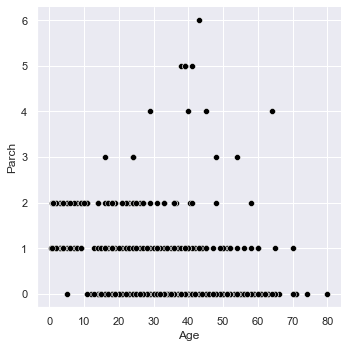

In [11]:
sns.relplot(x="Age", y="Parch",data=df,color="black")

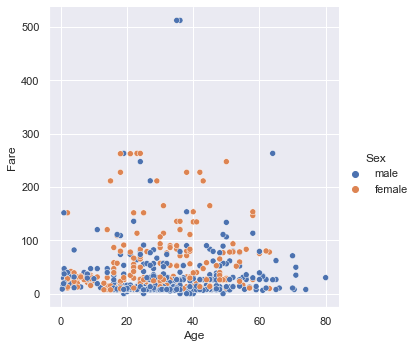

In [16]:
sns.relplot(x="Age",y="Fare", hue="Sex", color="red", data= df)

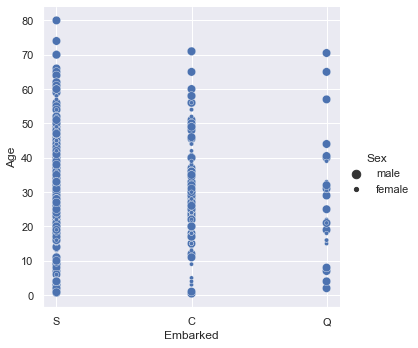

In [18]:
sns.relplot(x="Embarked", y="Age", size="Sex", data=df)

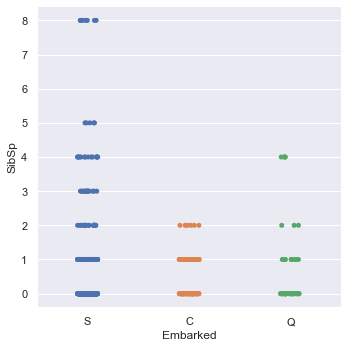

In [19]:
sns.catplot(x="Embarked",y="SibSp",data=df)

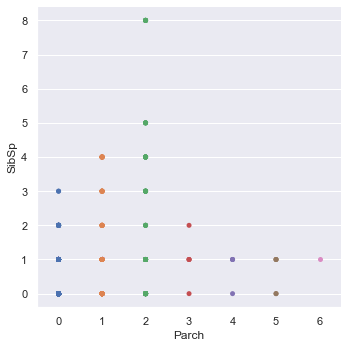

In [21]:
sns.catplot(x="Parch",y="SibSp",jitter=False,data=df)

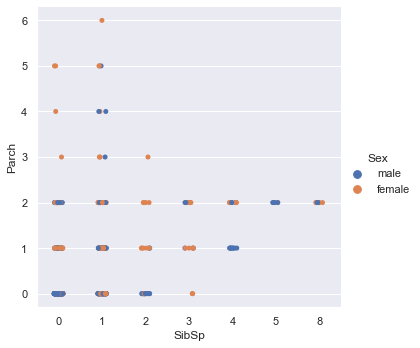

In [22]:
sns.catplot(x="SibSp",y="Parch", hue="Sex", data=df)

C:\Users\preetham\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


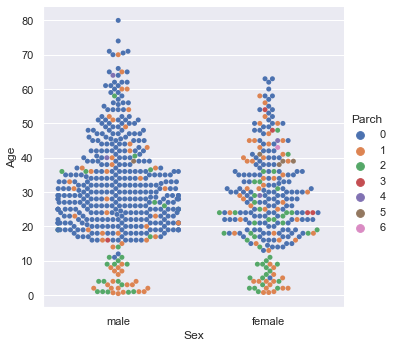

In [23]:
sns.catplot(x="Sex",y="Age", hue="Parch",kind="swarm", data=df)

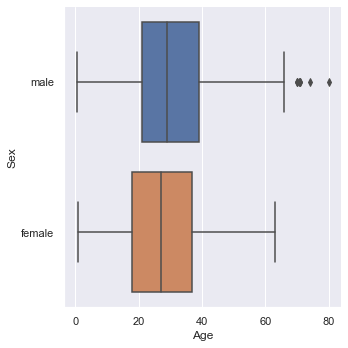

In [24]:
sns.catplot(x="Age", y="Sex", kind="box",data=df)

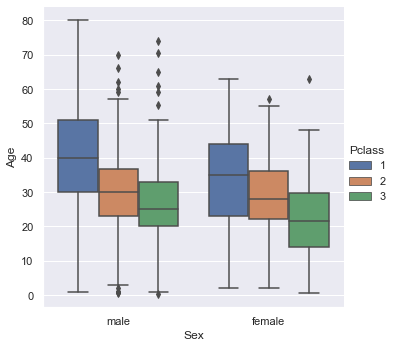

In [25]:
sns.catplot(x="Sex",y="Age", hue="Pclass",kind="box",data=df)

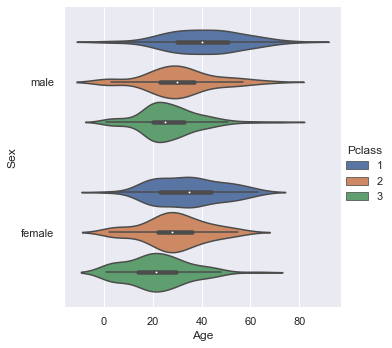

In [26]:
sns.catplot(x="Age", y="Sex", hue = "Pclass", kind = "violin", data=df)

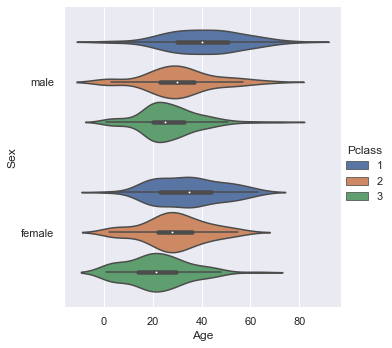

In [27]:
sns.catplot(x="Age", y="Sex", hue = "Pclass", kind = "violin",spilt=True, data=df)

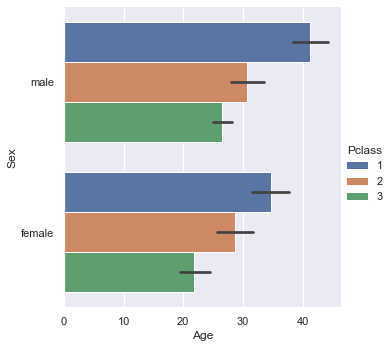

In [28]:
sns.catplot(x="Age", y="Sex", hue = "Pclass", kind = "bar", data=df)

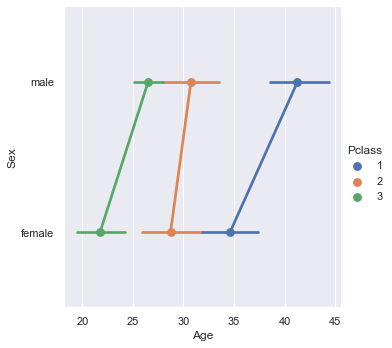

In [29]:
sns.catplot(x="Age", y="Sex", hue = "Pclass", kind = "point", data=df)

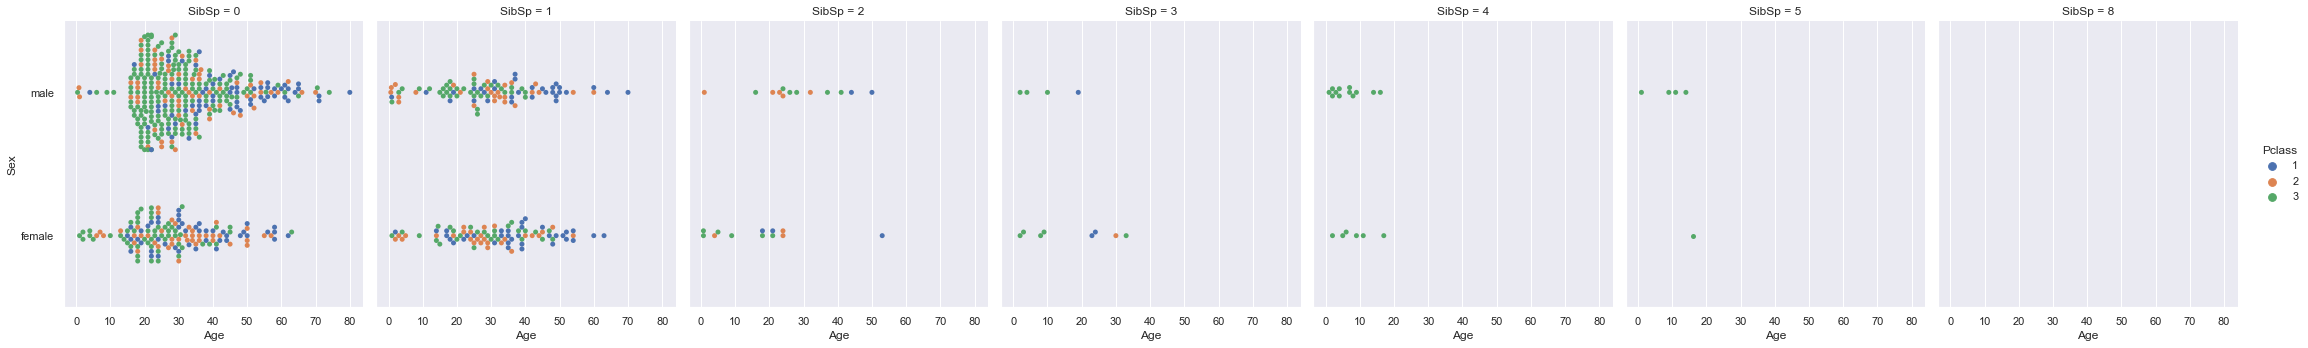

In [30]:
sns.catplot(x="Age", y="Sex", hue="Pclass",
            col="SibSp", aspect=.9,
            kind="swarm", data=df);

C:\Users\preetham\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

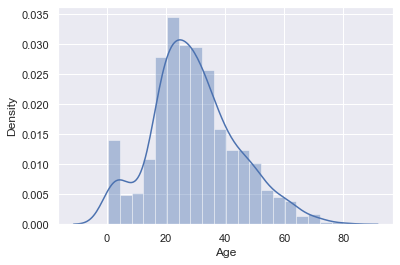

In [31]:
sns.distplot(df.Age)

C:\Users\preetham\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\preetham\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

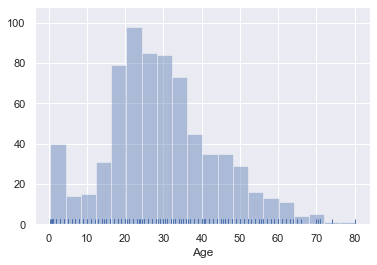

In [32]:
sns.distplot(df.Age, kde=False, rug = True)

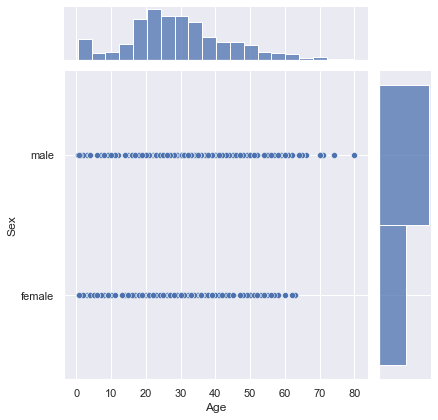

In [33]:
sns.jointplot(x="Age", y="Sex", data=df);

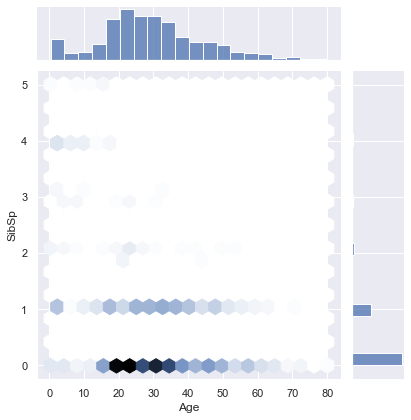

In [34]:
sns.jointplot(x=df.Age, y=df.SibSp, kind="hex", data = df)

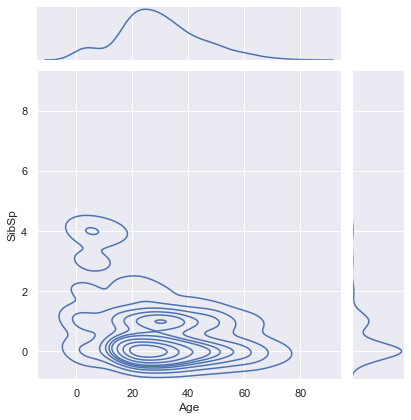

In [35]:
sns.jointplot(x="Age", y="SibSp", data=df, kind="kde");

<AxesSubplot:>

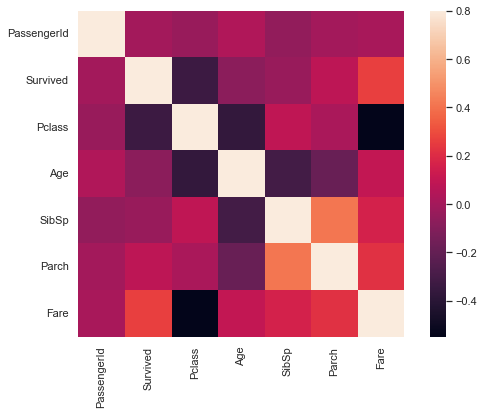

In [36]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corrmat, vmax=.8, square=True)

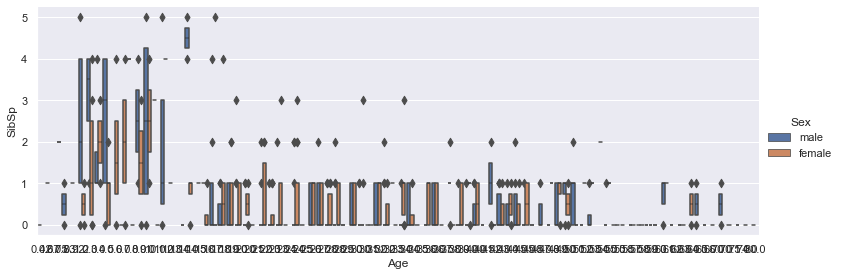

In [37]:
sns.catplot(x="Age", y="SibSp", data=df, kind="boxen",height=4, aspect=2.7, hue = "Sex")

C:\Users\preetham\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\preetham\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\preetham\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\preetham\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` param

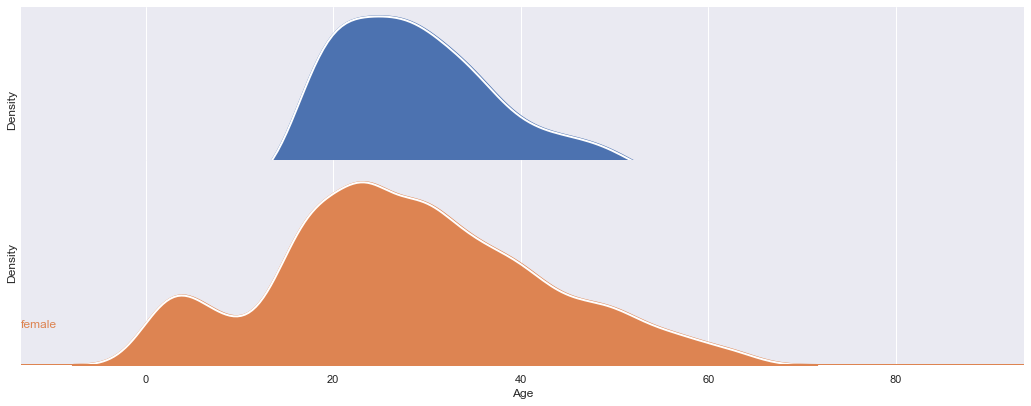

In [38]:
 #Initialize the FacetGrid object
g = sns.FacetGrid(df, row="Sex", hue="Sex", aspect=5, height=3)

# # Draw the densities in a few steps
g.map(sns.kdeplot, "Age", shade=True, alpha=1, lw=3.5, bw=.2)
g.map(sns.kdeplot, "Age", color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2)

# # Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color=color, ha="left", va="center", transform=ax.transAxes)
g.map(label, "Age")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# # Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

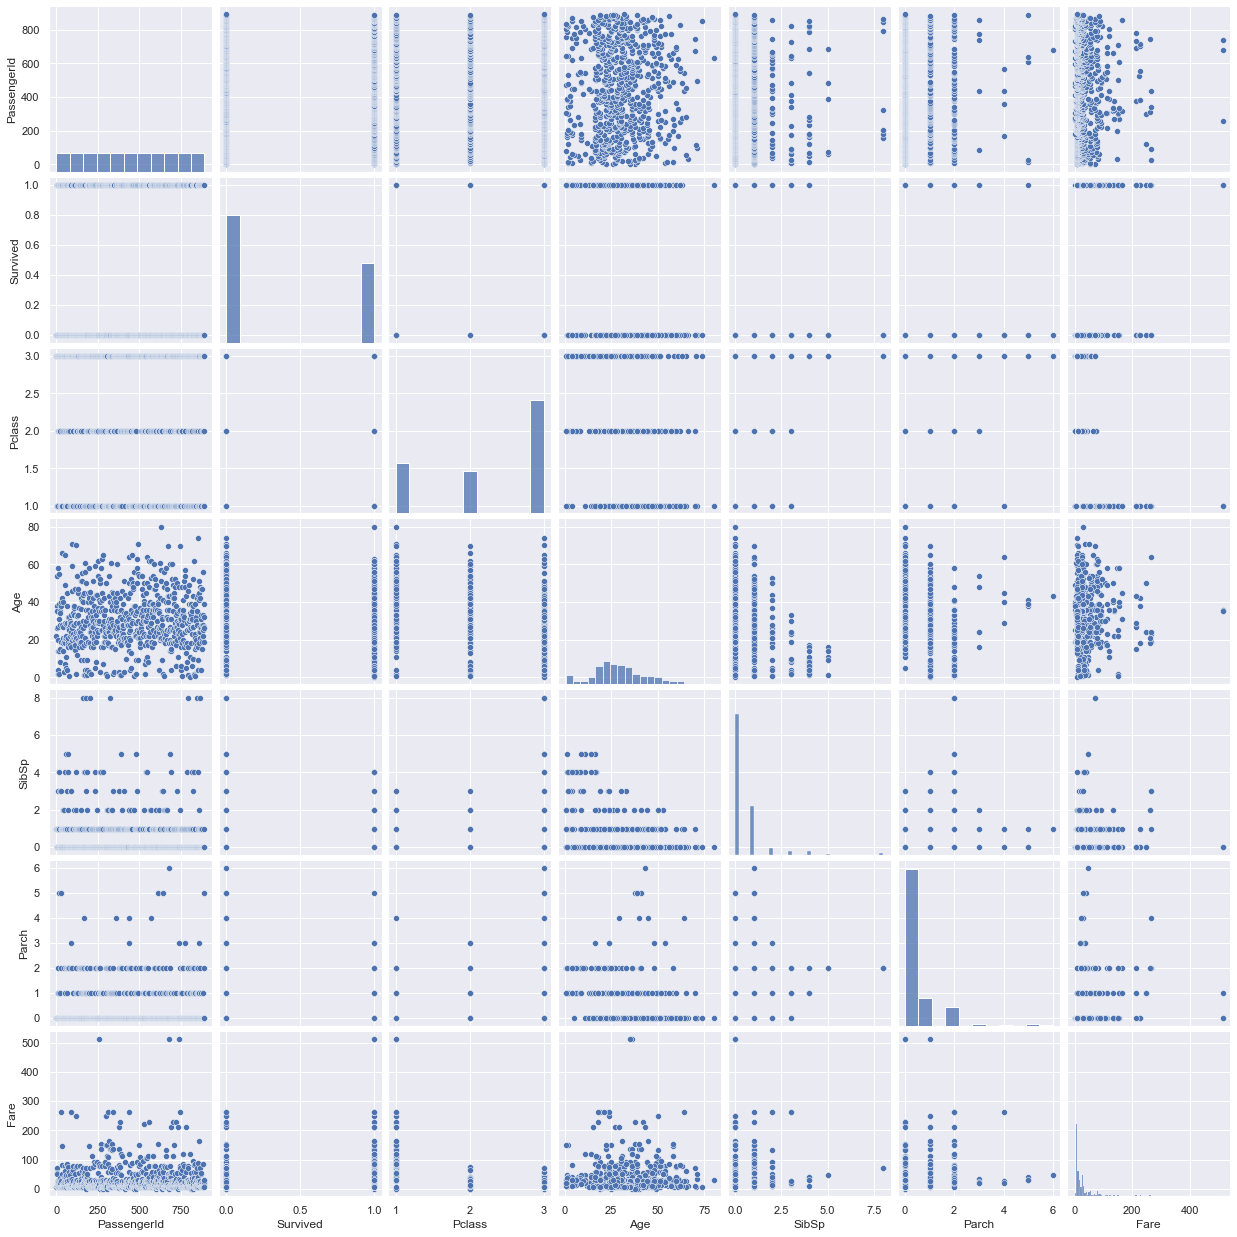

In [39]:
sns.pairplot(df)